In [1]:
from TalentPeru.extract import extract_jobs_in_parallel
from TalentPeru.transform import clean_jobs_data


In [2]:

data = extract_jobs_in_parallel(lima="15")






































































































































































Departamento de Lima - izquierda a derecha: 100%|██████████| 80/80 [06:27<00:00,  4.84s/it]








Departamento de Lima - derecha a izquierda: 100%|██████████| 81/81 [06:30<00:00,  4.82s/it]


In [3]:
clean_data = clean_jobs_data(data)

In [4]:
clean_data.head()

,job_posting_url,vacancies,job_posting_number,salary,start_publication_date,end_publication_date,required_experience,educational_background,specialization,required_knowledge,skills,job_title,public_institution,ubication,ubication_region,ubication_dist,day_data_extract_dmy,uuid,experience_months,min_education
0,https://app.qaliwarma.gob.pe/website/,1,D.Leg 1057 - Determinado (Necesidad Transitori...,4000.0,11/11/2024,22/11/2024,Experiencia General: Experiencia Laboral Mínim...,"Título Universitario En Administración, Contab...",Curso En Sistemas De Gestión Administrativa. C...,Conocimiento De Normatividad Del Sector Públic...,"Competencias Genéricas: Trabajo En Equipo, Ori...",Administrador,Programa Nacional De Alimentación Escolar Qali...,AMAZONAS - CHACHAPOYAS,AMAZONAS,CHACHAPOYAS,11-11-2024,2742c873-9c92-4f27-ae93-1d7cd81e8094,36,colegiado
1,https://casrrhh.aurora.gob.pe/convocatorias/,1,D.Leg 1057 - Determinado (Necesidad Transitori...,4000.0,11/11/2024,22/11/2024,"""• Experiencia General Seis (06) Meses De Expe...",• Título Profesional Universitario En Trabajo ...,•Capacitación Acreditada En Temas Relacionados...,"""• Conocimiento Sobre Valoración Y Gestión De ...","• Empatía, Comunicación Efectiva, Vocación De ...",Un/A (01) Trabajador/A Social Para Cem_Comisar...,Progr Nac Para La Prevenc Y Erradic De La Viol...,AMAZONAS - LAMUD,AMAZONAS,LAMUD,11-11-2024,7bb650e5-1fc6-4d48-b7ba-c3b7faa6344b,6,colegiado
2,https://app.qaliwarma.gob.pe/website/,3,D.Leg 1057 - Determinado (Necesidad Transitori...,2500.0,11/11/2024,22/11/2024,Experiencia General: Experiencia Laboral Mínim...,Grado Académico De Bachiller O Titulo Técnico ...,Curso O Taller En Buenas Prácticas De Manipula...,Conocimiento En Legislación Alimentaria O Norm...,"Competencias Genéricas: Vocación De Servicio, ...",Monitor De Gestión Local,Programa Nacional De Alimentación Escolar Qali...,AMAZONAS - NIEVA,AMAZONAS,NIEVA,11-11-2024,2e572a99-c845-42b4-9e8c-f82250fb91ff,24,tecnico
3,https://www.inabif.gob.pe/portalweb/convocator...,1,D.Leg 1057 - Determinado (Necesidad Transitori...,5000.0,08/11/2024,21/11/2024,Experiencia Laboral General: Tres (03) Años En...,Título Profesional Universitario En Las Carrer...,Cursos Y/O Programas De Especialización De Ges...,"Conocimientos Técnicos De Gestión Pública, Pol...","Vocación De Servicio, Comunicación Asertiva, E...",Analista De Acompañamiento Profesional,Programa Integral Nacional Para El Bienestar F...,AMAZONAS - CHACHAPOYAS,AMAZONAS,CHACHAPOYAS,11-11-2024,9153ad15-c9f1-4cc7-a586-ed3e60fab164,36,titulado
4,https://www.inabif.gob.pe/portalweb/convocator...,1,D.Leg 1057 - Determinado (Necesidad Transitori...,3000.0,08/11/2024,21/11/2024,Experiencia Laboral General: Dos (02) Años En ...,Título Profesional Universitario En La Carrera...,Curso Y/O Programa De Especialización Relacion...,"Conocimientos Técnicos De Psicología Social, P...","Comunicación Asertiva, Control, Proactividad E...",Educador/A,Programa Integral Nacional Para El Bienestar F...,AMAZONAS - BAGUA,AMAZONAS,BAGUA,11-11-2024,7c310243-09d6-4e30-bfbf-5ffc0e32b343,24,titulado


In [45]:
clean_data = clean_data[~((clean_data['salary'] > 2000) & (clean_data['experience_months'] < 6))].dropna()

11000.0


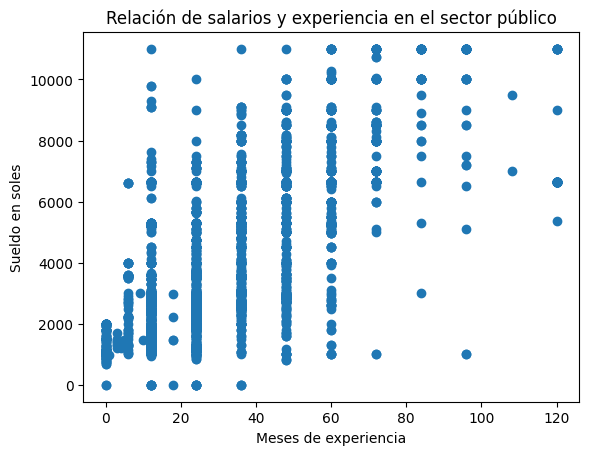

In [57]:
import pandas as pd, matplotlib.pyplot as plt
p99 = clean_data['salary'].quantile(0.99)
clean_data1:pd.DataFrame = clean_data.copy()
clean_data1['salary'] = clean_data1['salary'].apply(lambda x: min(x, p99))

plt.scatter(clean_data1['experience_months'], clean_data1['salary'])
plt.xlabel("Meses de experiencia")
plt.ylabel("Sueldo en soles")
plt.title("Relación de salarios y experiencia en el sector público")
plt.show()


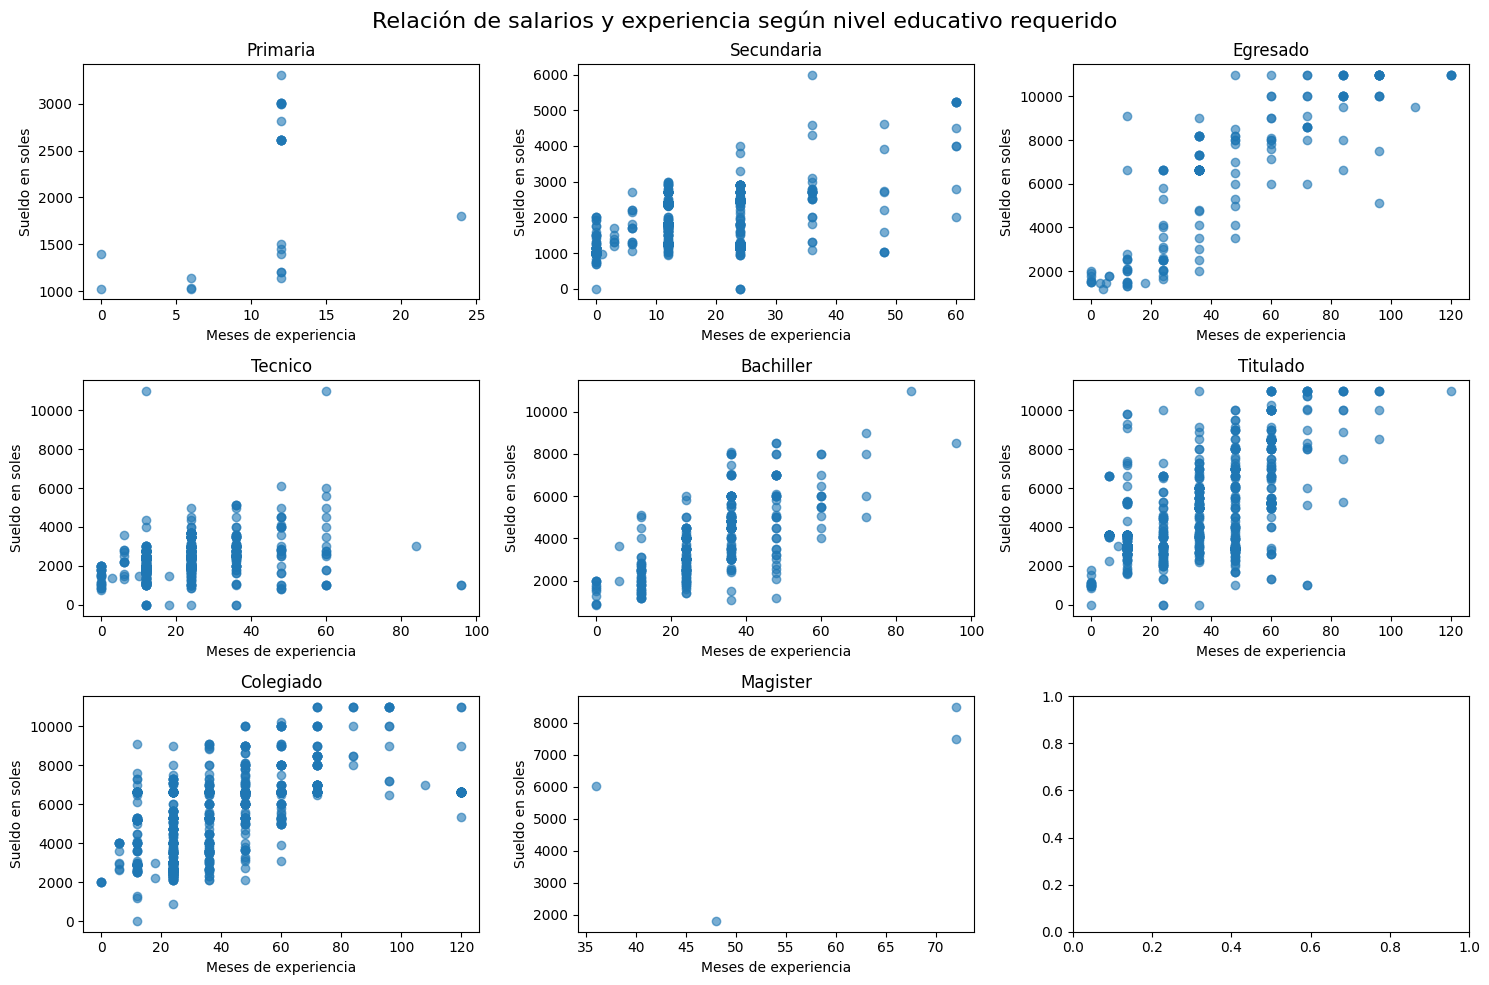

In [63]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
unique_educations = clean_data1['min_education'].unique()
for i, min_educacion_value in enumerate(['primaria', 'secundaria', 'egresado', 'tecnico', 'bachiller', 'titulado', 'colegiado', 'magister']):
    row = i // 3
    col = i % 3
    if i == 8:
        continue

    data_filtered = clean_data1[clean_data1['min_education'] == min_educacion_value]
    axs[row, col].scatter(
        'experience_months', 'salary', 
        data=data_filtered, 
        alpha=0.6,
        label=f'{min_educacion_value}'
    )
    axs[row, col].set_xlabel("Meses de experiencia")
    axs[row, col].set_ylabel("Sueldo en soles")
    axs[row, col].set_title(f"{min_educacion_value.title()}")
fig.suptitle("Relación de salarios y experiencia según nivel educativo requerido", fontsize=16)
plt.tight_layout()
plt.show()
